# HW 2

This assignment covers several aspects of Linear Regresstion. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* Follow [README.md](README.md) for homework submission instructions


## Tutorials

* [scikit-learn linear model](https://scikit-learn.org/stable/modules/linear_model.html)
* [train-test-split](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
* [least squares fitting](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Seaborn](https://seaborn.pydata.org/api.html)


# REGRESSION TASK USING SKLEARN

In jupyter notebook environment, commands starting with the symbol % are magic commands or magic functions. ```%%timeit``` is one of such function. It basically gives you the speed of execution  of certain statement or blocks of codes.

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Data ** Get the exploratory data and the folowwing files:      
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

**or** Use from our 2024Spring/data repository folder

* Link should automatically download the data
* copy them in your HW folder

* If you are using command line: 
```>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data```
  * If wget is not working 
    * dowload it from [link](https://eternallybored.org/misc/wget/) 
    * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1** Read the data using pandas, and replace the ??? in the code cell below to accomplish this taks. Note that auto-mpg.data does not have the column headers. use auto-mpg.names file to provide column names to the dataframe. 

**A1** 

In [234]:
# Replace ??? with code in the code cell below
column_names = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'car name' ]
df = pd.read_csv( '../data/auto-mpg.data', names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True )

In [235]:
# View head of the data to confirm the correctness of your answer
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


## Data cleaning and manipulation

Use

**Q2** Data cleaning and manipulation: 
1. use ```pandas.info()``` method to find columns with large number of NaN values
2. remove the column with NaN values
3. Check if there are still NaN values in the dataframe using ```isna()``` method

**A2** Replace ??? with code in the code cell below

In [236]:
#1. use pandas.info() method to find columns with large number of NaN values
df.info()

#2. remove the column with NaN values - replace ??? with code
df.drop( columns=['car name'], inplace=True )
# Print head
df.head()

#3. Check if there are still NaN values in the dataframe using ```isna()``` method - replace ??? with code 
df.isna()
# drop if any left or replace Nan values
df.dropna( axis=0, inplace=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [237]:
#Print Tail
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


**Q3:** 
1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
2. Do data normalization on real value/continous columns
   * The formula for normalization is: (Col_value- Mean of the col)/ Standard Deviation of the col

**A3** Replace ??? with code in the code cell below

In [238]:
# 1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
cols = [ 'cylinders', 'year', 'origin' ]
df_dummies = pd.get_dummies( data=df, columns=cols )

#show the head
df_dummies.head()

# 2. Do data normalization on real value/continous columns
realcols = [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ]

for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = ( df[col] - mean ) / std

## Regression Task

Given all the information we will try to predict mpg - miles per gallon. The First step toward predicting the mpg from the dataset is to find the correlation between the columns/features of the dataset.  

**Q4** 
1. Use heatmap chart from seaborn library to findout the correlation between the columns.
2. Which of the columns is mostly related to mpg column and why?

<Axes: >

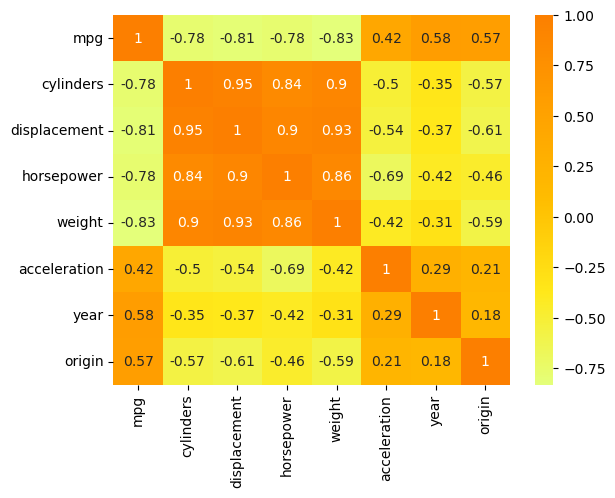

In [239]:
# A4 code goes below
sns.heatmap( data=df.corr(), cmap='Wistia', annot=True )

**A4**  
acceleration, year, and origin have similar heat signitures as the mpg column. cylinders, displacement, horsepower, and weight have a negative correlation with mpg because they are factors that inhibit mpg.

**Q5** 
1. Draw a lineplot or scattered plot between mpg and your answer from the above cell. 
2. Use pairplot from sns to plot our data frame df for better understanding of your selection 
   * NOTE: 2. should inform 3.
3. Choose a set of columns/ features based on pairplot and heatmap for the mpg prediction.
* Justify your answer using some explanation from the heatmap and pairplot graph formulated from the dataset.

**A5**  For 1. and 2. replace ??? with code in the code cell below.  

c:\Users\Isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


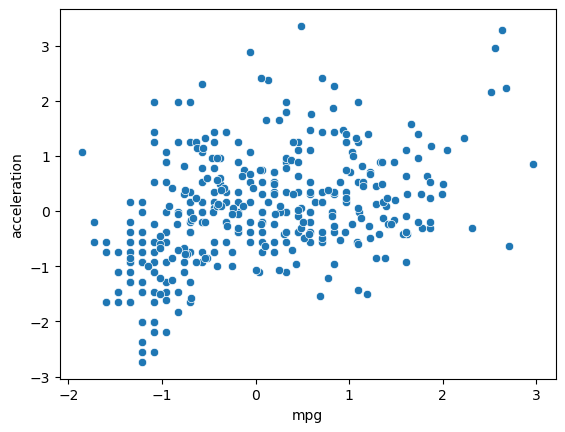

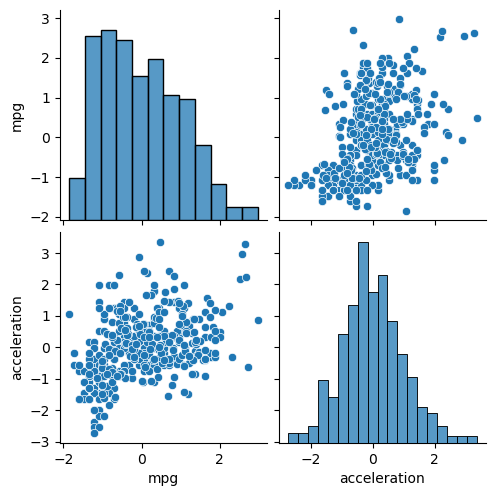

In [240]:
# 1. Draw a lineplot or scattered plot between mpg and your answer from the above cell.
sns.scatterplot( x=df[ 'mpg' ], y=df[ 'acceleration' ] )
# 2. Use pairplot from sns to plot our data frame df for better understanding of your selection 
sns.pairplot( data=df, vars=['mpg', 'acceleration'] )

**A5**  
although the correlation between mpg and acceleration exists in the 0.5 range, there is a somewhat wide spread of the data, but there is some indication of a positive linear relation as the datapoints range higher in acceleration as mpg increases, and vise versa.


**Q6** Data Visualization: 
1. Now, create a histogram which represents number items with per cylinder class

**A6** Replace ??? with code in the code cell below


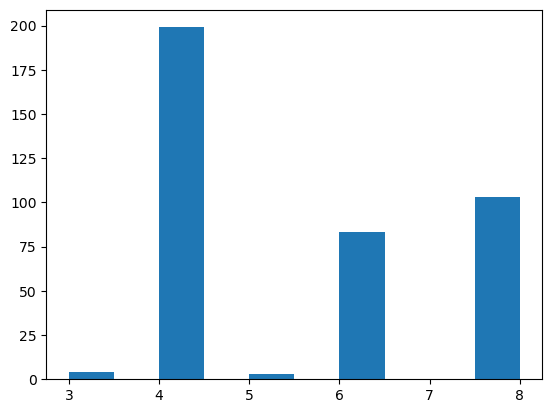

In [241]:
plt.hist( x=df[ 'cylinders' ] )
plt.show()

## Data Preparation

**Q7** Assign mpg column value to y and rest columns to x, remember x shouldn't have mpg

**A7** Replace ??? with code in the code cell below

In [242]:
y = df[ 'mpg' ]
df.drop( columns=['mpg'], inplace=True )
x = df

**Q8** Use train_test_split to split the data set as train:test=(80%:20%) ratio.

**A8** Replace ??? with code in the code cell below

In [243]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.2 )
# View the shape of your data set
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((313, 7), (79, 7), (313,), (79,))

**Q9** Follow examples from references given in the top of this notebook  
* Note:Use linear model to fit regression line and plot  
* Our linear model will be of following type  
* Y = b + coef0*x0 + coef1*x1+coef2*x2+............  

**A9:** Replace ??? with code in the code cell below

In [244]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit( xtrain, ytrain )

#Now view the coefficient use .coef_ and shape of .coef_
print(reg.coef_)
print(reg.intercept_)
print(reg.coef_.shape[0])

[-0.08247912  0.28194216 -0.11269254 -0.68880101  0.01633666  0.08930553
  0.15215486]
-6.575451117311555
7


**Q10** Relates to the code in the cell below. Why the printed values the same?

In [245]:
# Now if you view 
print(f'{reg.coef_.shape[0]},{xtrain.shape[1]}, ', f'are equal? {reg.coef_.shape[0]==xtrain.shape[1]}')

7,7,  are equal? True


**A10** 
reg.coef_.shape[0] indicates the number of coefficients, and xtrain.shape[1] indicates the number of features. These values are equal to assure the linear regression model sufficently fits the data.

## Model Scoring

In [246]:
# Model Score 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.8295003519285471, 0.7843648582373405)

**Q11**  Each of the sklearn models have different model evaluations core value.  
* LinearRegression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* More on [model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

Explain what's the meaning of reg.score return value in this notebook. 

**A11**
reg.score() evaluates the performance on the training and testing data of a linear regression model, and grades it on a scale of 0 to 1.

In [247]:
# A custom function to calculate r2 score
# Details on the custom scorers: https://scikit-learn.org/stable/modules/model_evaluation.html

def r2score_(ytrue, ypred):
  rss = ((ytrue - ypred)**2).sum()
  tss = ((ytrue - ytrue.mean()) ** 2).sum()
  r2 = 1 - rss/tss
  return r2

# Now do prediction on xtrain and xtest and check your r2 score by printing score values 
trainpredict = reg.predict(xtrain)
testpredict = reg.predict(xtest)

print(r2score_(ytrain, trainpredict), r2score_(ytest, testpredict))


0.8295003519285471 0.7843648582373405


One way of achieving linear regression is by minimizing the error between actual y and predicted y. The method is known as least square method.  We will make our custom least square optimize to calculate model parameters that minimizes output error.   

**Q12** Write a function which takes weights(or params), x and y and do following
* 1. calculate dot product between x and params , which is ypredicted
* 2. calculate difference between actual y and ypredicted
* 3. return the difference

**A12** complete the code below

In [254]:
import scipy.optimize as optimization
from sklearn.metrics import r2_score

def constraint(params, x, y):
  ypred = x@params
  return y-ypred

# Our initial params is a vector of size equal to dimension of x, or you can say number of columns of x
# You can create zeros vector using np.zeros(size)

# complete code
params = np.zeros( xtrain.shape[1] )


# Now study the documentation and complete following code
params, _ = optimization.leastsq( constraint, params, args=(xtrain, ytrain) )

# Now we have parameter or weight we can now create our model
model = lambda x:np.dot( x, params )

# Now predict ytrain using model and see first 5 predicted and actual values
ypred_train = model( xtrain )
# see first 5 predicted values
print( ypred_train[:5], '\n' )
# see first 5 actual values
print( ytrain[:5], '\n' )

# Now predict ytest using model and see first 5 predicted and actual values
ypred_test = model( xtest )
print( ypred_test[:5], '\n' )
print( ytest[:5], '\n' )

# Now use custom made r2score calculator to calculate r2 score on both train and test set
print( r2score_(ytest, ypred_test), r2score_(ytrain, ypred_train) )

# Now use sklearn build-in r2score calculator to calculate r2 score on both train and test set
print( r2_score(ytest, ypred_test), r2_score(ytrain, ypred_train) )

[0.8587358  0.58952912 1.03059321 0.39654837 0.57854441] 

167    0.711605
46    -0.185255
244    2.518137
392    0.455359
171    0.070991
Name: mpg, dtype: float64 

[ 0.61401728 -1.40804452  0.01083304 -1.21519315  0.58850195] 

150    0.327236
103   -1.594607
194   -0.121194
40    -1.210238
149    0.070991
Name: mpg, dtype: float64 

0.6384723039420903 0.7658655609812453
0.6384723039420903 0.7658655609812453
